# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [3]:
df=pd.read_excel("/Users/shriya/Downloads/default.xls", header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Preprocessing the data

Renamed target column in the data set in order to make it easier on the eyes

In [5]:
df.rename({'default payment next month':'default'}, axis='columns', inplace=True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Checking the data types in other to check whether all the data is consistent. This will help us eliminate the missing values.

In [7]:
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

Checking all the categorical data in order to eliminate data that has not been defined in the data set.

Gender (1 = male; 2 = female).
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
Marital status (1 = married; 2 = single; 3 = others).

Education and Marital status have 0 in a few columns. Since it is not defined, we will eliminate it.

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
df['SEX'].unique()


array([2, 1])

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [11]:
len(df[(df['EDUCATION']==0)|(df['MARRIAGE']==0)])

68

In [12]:
df_no_miss=df.loc[(df['EDUCATION']!=0)&(df['MARRIAGE']!=0)]

In [13]:
len(df_no_miss)

29932

In [14]:
x=df_no_miss.drop('default', axis=1)
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [23]:
y=df_no_miss['default'].copy()
y.head()


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [28]:
len(x_enc)

29932

# One Hot Encoding

We split the categorical data into binary values. That is we split categorical data into separate columns. We use 0 or 1 to denote True or False

In [27]:
x_enc= pd.get_dummies(x,columns=['MARRIAGE','SEX','EDUCATION','PAY_0','PAY_2','PAY_3', 'PAY_4','PAY_5','PAY_6'])

In [29]:
x_enc.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [18]:
y.unique()

array([1, 0])

# Preparing the data for training

In [24]:
len(x_enc)

5

In [19]:
sum(y)/len(y)

0.22153548042229051

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x_enc, y,stratify=y)

We have used stratify to split the target data in the same proportion in the training and testing data. We have also checked them below.

In [31]:
sum(y_train)/len(y_train)

0.2215243440687781

In [32]:
sum(y_test)/len(y_test)

0.22156888948282774

# Training and evaluating the data

In [43]:
cl_xgb=xgb.XGBClassifier(objective='binary:logistic', missing=1)
cl_xgb.fit(x_train, y_train, 
           verbose=True,
           early_stopping_rounds=10, 
           eval_metric='aucpr',
           eval_set=[(x_test, y_test)])

[0]	validation_0-aucpr:0.51154
[1]	validation_0-aucpr:0.52736
[2]	validation_0-aucpr:0.53008
[3]	validation_0-aucpr:0.53922
[4]	validation_0-aucpr:0.53870
[5]	validation_0-aucpr:0.53921
[6]	validation_0-aucpr:0.53772
[7]	validation_0-aucpr:0.53426
[8]	validation_0-aucpr:0.53593
[9]	validation_0-aucpr:0.53592
[10]	validation_0-aucpr:0.53560
[11]	validation_0-aucpr:0.53698
[12]	validation_0-aucpr:0.53790
[13]	validation_0-aucpr:0.53793


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

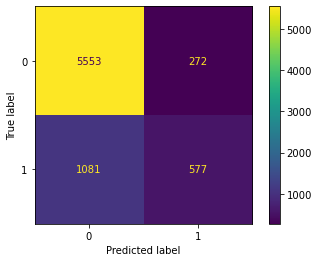

In [44]:
plot_confusion_matrix(cl_xgb,
                     x_test,
                     y_test,
                     values_format='d'
                     )

As you can see from the confusion matrix, the model is able to predict who did not default with very good accuracy (95%). However, the model fails to accurate determine those who will end up defaulting (34.8%). The overall model has an accuracy of 82%

# Optimising the hyperparameters

In [56]:
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0.25, 0.5,1],
    'reg_lambda':[0,1,10],
    'scale_pos_weight':[1,3,5]
}
opt_par= GridSearchCV(
estimator=xgb.XGBClassifier(objective='binary:logistic',
                           subsample=0.9,
                           colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

In [57]:
opt_par.fit(x_train, y_train, early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(x_test,y_test)],
           verbose=False)

print(opt_par.best_params_)

/Users/shriya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 5}


In [58]:
cl_xgb=xgb.XGBClassifier(objective='binary:logistic',
       gamma=1,
       learning_rate=0.05,
       max_depth=5,
       reg_lambda=10,
       scale_pos_weight=5,
       subsample=0.9,
       colsample_bytree=0.5)

cl_xgb.fit(x_train,
          y_train,
          verbose=True,
          early_stopping_rounds=10, 
          eval_metric='aucpr',
          eval_set=[(x_test, y_test)])

[0]	validation_0-aucpr:0.49228
[1]	validation_0-aucpr:0.51127
[2]	validation_0-aucpr:0.52534
[3]	validation_0-aucpr:0.52986
[4]	validation_0-aucpr:0.53230
[5]	validation_0-aucpr:0.53603
[6]	validation_0-aucpr:0.53178
[7]	validation_0-aucpr:0.53090
[8]	validation_0-aucpr:0.53352
[9]	validation_0-aucpr:0.53189
[10]	validation_0-aucpr:0.53413
[11]	validation_0-aucpr:0.53765
[12]	validation_0-aucpr:0.53724
[13]	validation_0-aucpr:0.53839
[14]	validation_0-aucpr:0.53930
[15]	validation_0-aucpr:0.54010
[16]	validation_0-aucpr:0.53994
[17]	validation_0-aucpr:0.54033
[18]	validation_0-aucpr:0.53957
[19]	validation_0-aucpr:0.54058
[20]	validation_0-aucpr:0.54129
[21]	validation_0-aucpr:0.54162
[22]	validation_0-aucpr:0.54130
[23]	validation_0-aucpr:0.54227
[24]	validation_0-aucpr:0.54425
[25]	validation_0-aucpr:0.54438
[26]	validation_0-aucpr:0.54463
[27]	validation_0-aucpr:0.54453
[28]	validation_0-aucpr:0.54506
[29]	validation_0-aucpr:0.54499
[30]	validation_0-aucpr:0.54517
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

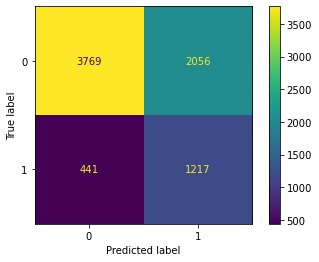

In [59]:
plot_confusion_matrix(cl_xgb,
                     x_test,
                     y_test,
                     values_format='d'
                     )

The above confusion matrix shows that the model will precict the defaulters better that before (74%). However, the people who will not default were not predicted with the same amount of accuracy. The accuracy is 65% now. The overall accuracy of the model is 67%

# Displaying the XGBoost Tree

/Users/shriya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
weight: {'PAY_0_2': 1, 'PAY_4_2': 1, 'PAY_AMT4': 1, 'PAY_0_0': 3, 'LIMIT_BAL': 5, 'PAY_2_0': 1, 'BILL_AMT5': 1, 'PAY_2_-2': 1, 'PAY_AMT6': 2, 'PAY_5_2': 2, 'PAY_3_-1': 1}
gain: {'PAY_0_2': 3609.83936, 'PAY_4_2': 1246.22278, 'PAY_AMT4': 855.895264, 'PAY_0_0': 146.2618613, 'LIMIT_BAL': 136.396258276, 'PAY_2_0': 115.443665, 'BILL_AMT5': 13.6541748, 'PAY_2_-2': 2.10101008, 'PAY_AMT6': 9.43365476, 'PAY_5_2': 12.79561425, 'PAY_3_-1': 1.95214844}
cover: {'PAY_0_2': 9513.5, 'PAY_4_2': 7812.0, 'PAY_AMT4': 6877.75, 'PAY_0_0': 1679.5833333333333, 'LIMIT_BAL': 1443.8, 'PAY_2_0': 2773.25, 'BILL_AMT5': 597.25, 'PAY_2_-2': 3.75, 'PAY_AMT6': 1147.5, 'PAY_5_2': 168.5, 'PAY_3_-1': 1697.25}
total_gain: {'PAY_0_2': 3609.83936, '

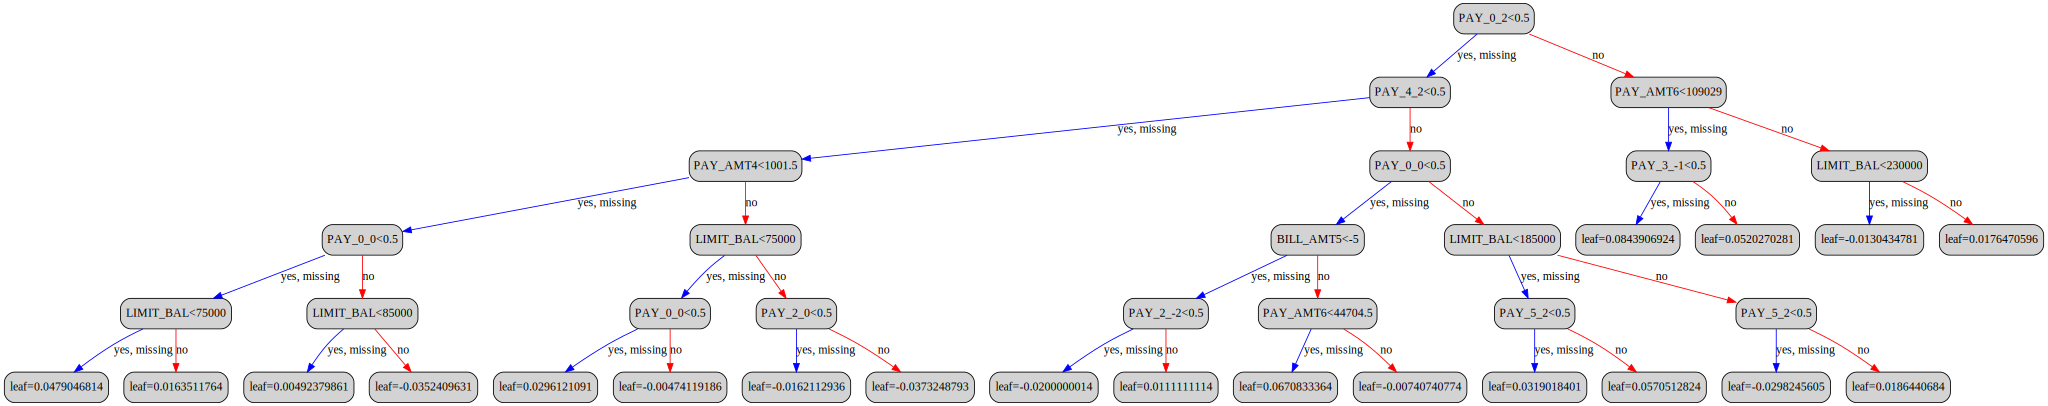

In [69]:
cl_xgb=xgb.XGBClassifier(objective='binary:logistic',
       gamma=1,
       learning_rate=0.05,
       max_depth=5,
       reg_lambda=10,
       scale_pos_weight=5,
       subsample=0.9,
       colsample_bytree=0.5,
       n_estimators=1)

cl_xgb.fit(x_train,
          y_train)
bstr=cl_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s:'%importance_type, bstr.get_score(importance_type=importance_type))
node_par={'shape':'box',
           'style':'filled, rounded'}
leaf_par={'shape':'box',
           'style':'filled, rounded'}
xgb.to_graphviz(cl_xgb, num_trees=0, size="5,5", 
               condition_node_params=node_par,
               leaf_node_params=leaf_par)